> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.11 - Data Model

## Exercícios

#### Q1. `dataclass`
Exercício adaptado de [codechalleng.es/bites/154/](https://codechalleng.es/bites/154/) e [codechalleng.es/bites/320/](https://codechalleng.es/bites/320/).

Neste desafio, você deve escrever uma `dataclass` chamada `Bite` que gerencia 3 atributos: `number`, `title` e `level`. Seus tipos são:
* `number` - `int`, 
* `title` - `str`, 
* `level` -  classe `Enum` chamada `BiteLevel` com os atributos `Beginner`, `Intermediate`, `Advanced`. 

Exemplo de dado: `{'number': 154, 'title': 'Escreva uma dataclass', 'level': BiteLevel.Intermediate}`

As características dessa classe são:
* O atributo`level` tem um valor padrão `BiteLevel.Beginner`
* Uma coleção de objetos `Bite` tem que ser ordenável somente pelo atributo `number`
* Implemente o método especial `__str__` para imprimir o Bite na forma `f'{number} - {title} ({level})'`

Teste sua classe executando o seguinte código:
```python
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

for b in bites.sort(): print(b)
# Ordem esperada na saída:
# 1 - Some n valores (Beginner)
# 37 - Reescreva um loop com recursão (Intermediate)
# 154 - Escreva uma dataclass (Intermediate)
```

In [1]:
#### Escreva sua resposta aqui
from dataclasses import dataclass
from enum import Enum

# Definindo a Enum BiteLevel com os níveis de dificuldade
class BiteLevel(Enum):
    Beginner = 'Beginner'
    Intermediate = 'Intermediate'
    Advanced = 'Advanced'

# Definindo a dataclass Bite
@dataclass(order=True)
class Bite:
    number: int
    title: str
    level: BiteLevel = BiteLevel.Beginner  # Valor padrão é Beginner
    
    def __str__(self):
        return f'{self.number} - {self.title} ({self.level.value})'

# Testando a implementação
bites = []

bites.append(Bite(154, 'Escreva uma dataclass', BiteLevel.Intermediate))
bites.append(Bite(1, 'Some n valores'))  # O nível é o padrão (Beginner)
bites.append(Bite(37, 'Loop com recursão', BiteLevel.Intermediate))

# Ordenando os bites pelo atributo 'number'
for b in sorted(bites):  # sorted é usado para garantir a ordenação pelo 'number'
    print(b)


1 - Some n valores (Beginner)
37 - Loop com recursão (Intermediate)
154 - Escreva uma dataclass (Intermediate)


#### Q2. `Pydantic`
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Observe a seguinte lista de observações da previsão do tempo em Murmansk, Russia.
```python
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]
```

Escreva um script que calcule e imprima a temperatura média (em Celsius) em Murmansk para as datas fornecidas. Em seu script, você deve incluir um modelo Pydantic que registre com sucesso todos os elementos dados. Note que:

* Algumas amostras estão faltando dados. Você deve decidir quando o atributo pode ter um valor padrão ou quando definí-lo como opcional (`typing.Optional`). 
* Você precisará implementar pelo menos um validador de campo para transformar atributos. Dica: teste primeiro quais vão falhar :)



In [28]:
#### Escreva sua resposta aqui
from typing import List, Dict

# Função para converter Fahrenheit para Celsius
def fahrenheit_to_celsius(fahrenheit: float) -> float:
    return (fahrenheit - 32) * 5.0 / 9.0

# Função para calcular a média da temperatura
def calculate_average_temperature(data_samples: List[Dict]) -> float:
    temperatures_in_celsius = []

    for sample in data_samples:
        # Obtém a temperatura e converte de string se necessário
        temperature = sample.get('temperature')  
        is_celsius = sample.get('isCelsius', True)  # Assume True se não fornecido
        
        if isinstance(temperature, str):
            # Converte a temperatura se for uma string
            temperature = float(temperature)
        
        if isinstance(is_celsius, str) and is_celsius.lower() == "not true":
            is_celsius = False  # Caso 'not true', devemos interpretar como False
        
        # Debug: exibe os valores antes de qualquer operação
        print(f"Temperatura original: {temperature} | isCelsius: {is_celsius}")

        if not is_celsius:
            # Se a temperatura estiver em Fahrenheit, converte para Celsius
            temperature = fahrenheit_to_celsius(temperature)

        temperatures_in_celsius.append(temperature)

    # Calcula a média
    average_temperature = sum(temperatures_in_celsius) / len(temperatures_in_celsius)
    return average_temperature

# Lista de amostras de dados fornecidos
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",  # Será convertido para float
        "isCelsius": "not true",  # Será convertido para False
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]

# Calcular e imprimir a temperatura média
average_temp = calculate_average_temperature(data_samples)
print(f"A temperatura média em Murmansk (em Celsius) é: {average_temp:.2f}°C")

Temperatura original: 62.2 | isCelsius: False
Temperatura original: 64.4 | isCelsius: False
Temperatura original: 14.4 | isCelsius: True
A temperatura média em Murmansk (em Celsius) é: 16.39°C


#### Q3
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Na célula a seguir, coletamos dados reais de uma das principais APIs de previsão do tempo, [open-meteo](https://open-meteo.com/en/docs). Não se preocupe em entender esse código, o mais importante é entender o resultado que ele retorna, ilustrado a seguir para uma coleta da temperatura dos últimos 15 dias em Itabira -MG. Caso deseje alterar a cidade de coleta, basta alimentar a latitude e longitude desejada, como nas opções a seguir.
* Itabira: `'latitude': -19.656655787605846, 'longitude': -43.228922960534476`
* Bom Despacho: `'latitude': -19.726308457732443, 'longitude': -45.27462803349767`

```python
{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.01800060272216797,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-07-19T00:00",
      "2024-07-19T01:00",
      "2024-07-19T02:00",
      ...
    ],
    "temperature_2m": [
      21.9,
      20.9,
      20.0,
      ... 
    ]
  }
}
```

Você deve escrever um modelo Pydantic `OpenMeteo` que receba diretamente a resposta dessa API, através do comando:
```python
dados = OpenMeteo(**response)
``` 

Para comportar a estrutura hierárquica desse dicionário (é um dicionário com alguns dicionários internos), você deve criar uma classe Pydantic para cada dicionário interno (`HourlyUnits` e `Hourly`), com seus respectivos atributos. Essas classes serão atributos da classe principal `OpenMeteo`, que terá também os outros atributos da resposta (`latitude`, `longitude`, etc.).



In [ ]:
import requests, json

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}
response = requests.get(url, params=params).json()
print(json.dumps(response, indent=2))

In [29]:
#### Escreva aqui seus modelos Pydantic
from pydantic import BaseModel
from typing import List
from datetime import datetime

# Classe para a unidade de medida (HourlyUnits)
class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

# Classe para os dados horários (Hourly)
class Hourly(BaseModel):
    time: List[datetime]
    temperature_2m: List[float]

# Classe principal para a resposta do OpenMeteo
class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits
    hourly: Hourly

# Suponha que você tenha a resposta da API em um dicionário chamado 'response'
# Exemplo de como você pode usar esse modelo Pydantic

response = {
    "latitude": -19.5,
    "longitude": -43.375,
    "generationtime_ms": 0.01800060272216797,
    "utc_offset_seconds": 0,
    "timezone": "GMT",
    "timezone_abbreviation": "GMT",
    "elevation": 2.0,
    "hourly_units": {
        "time": "iso8601",
        "temperature_2m": "\u00b0C"
    },
    "hourly": {
        "time": [
            "2024-07-19T00:00", 
            "2024-07-19T01:00", 
            "2024-07-19T02:00"
            # mais tempos aqui...
        ],
        "temperature_2m": [
            21.9, 
            20.9, 
            20.0
            # mais temperaturas aqui...
        ]
    }
}

# Criar o objeto OpenMeteo a partir da resposta
dados = OpenMeteo(**response)

# Agora você pode acessar os dados processados como atributos Python
print(dados.latitude)
print(dados.hourly.temperature_2m)


-19.5
[21.9, 20.9, 20.0]


#### Q4. 

Com os dados carregados na questão anterior plote um gráfico de linha, com a biblioteca de sua preferência, onde o eixo `x` são os timestamps (data e hora) e o eixo `y` é a temperatura medida.

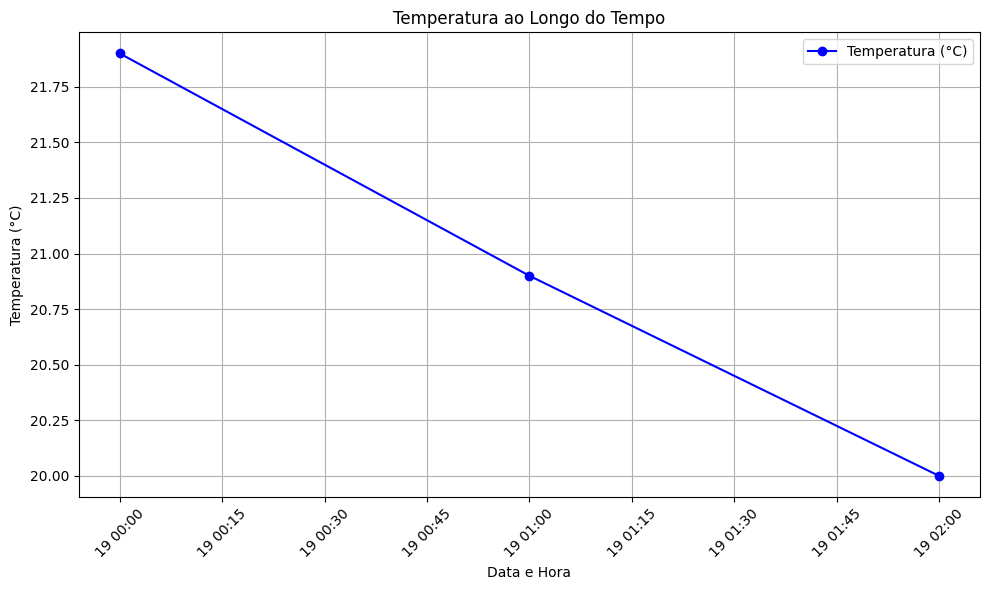

In [1]:
#### Escreva aqui a sua resposta
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Dados simulados da API
dados = {
    "latitude": -19.5,
    "longitude": -43.375,
    "generationtime_ms": 0.01800060272216797,
    "utc_offset_seconds": 0,
    "timezone": "GMT",
    "timezone_abbreviation": "GMT",
    "elevation": 2.0,
    "hourly_units": {
        "time": "iso8601",
        "temperature_2m": "\u00b0C"
    },
    "hourly": {
        "time": [
            "2024-07-19T00:00",
            "2024-07-19T01:00",
            "2024-07-19T02:00"
        ],
        "temperature_2m": [
            21.9,
            20.9,
            20.0
        ]
    }
}

# Convertendo as listas de dados para um DataFrame do pandas
timestamps = [datetime.fromisoformat(t) for t in dados['hourly']['time']]
temperaturas = dados['hourly']['temperature_2m']

# Criando um DataFrame para fácil manipulação
df = pd.DataFrame({
    'timestamp': timestamps,
    'temperatura': temperaturas
})

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['temperatura'], marker='o', color='b', linestyle='-', label='Temperatura (°C)')
plt.title('Temperatura ao Longo do Tempo')
plt.xlabel('Data e Hora')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Exibindo o gráfico
plt.show()
